In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,label,x1,x2
0,1,2.6487,4.5192
1,1,1.5438,2.4443
2,1,1.8990,4.2409
3,1,2.4711,5.8097
4,1,3.3590,6.4423


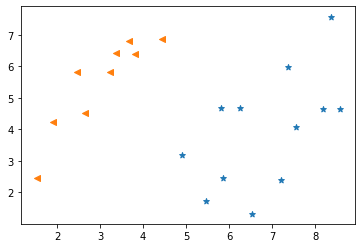

In [4]:
plt.scatter(df[df['label'] == 0]['x1'], df[df['label'] == 0]['x2'], marker='*')
plt.scatter(df[df['label'] == 1]['x1'], df[df['label'] == 1]['x2'], marker='<')

In [5]:
x_input = df[['x1','x2']].values
y_label = df[['label']].values

In [6]:
x = tf.Variable(x_input, dtype=tf.float32)
y = tf.Variable(y_label, dtype=tf.float32)

In [7]:
Number_of_features = 2
Number_of_units = 1
learning_rate = 0.01

# weights and bias
weight = tf.Variable(tf.zeros([Number_of_features, Number_of_units]))  
bias = tf.Variable(tf.zeros([Number_of_units]))

#optimizer
optimizer = tf.optimizers.SGD(learning_rate)


In [8]:
def perceptron(x):
    z = tf.add(tf.matmul(x,weight),bias)
    output = tf.sigmoid(z)
    return output

def train(i):
    for n in range(i):
        loss = lambda: abs(tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=perceptron(x))))
        optimizer.minimize(loss, [weight, bias])
 
#Train the perceptron
train(1000)


In [9]:
tf.print(weight, bias)

[[-0.844034135]
 [0.673354745]] [0.0593947917]


In [10]:
ypred = perceptron(x)

In [11]:
ypred = tf.round(ypred)

In [14]:
acc = accuracy_score(y.numpy(), ypred.numpy())
print(acc)

1.0


In [15]:
cnf_matrix = confusion_matrix(y.numpy(), ypred.numpy())
print(cnf_matrix)

[[12  0]
 [ 0  9]]
